**¡Hola Francisco! 😊**

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**

-----

<div class="alert alert-block alert-warning">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Francisco has demostrado buenas habilidades en la etapa de preparación de datos para tu proyecto, lo cual establece una base firme para tu análisis. En el apartado de visualización, utilizaste herramientas efectivas para comprender el comportamiento de consumo de los usuarios en diferentes planes, mostrando habilidad para representar datos complejos, esta aproximación también debes aplicarla a los datos de ingresos. Por ot, tu enfoque en las pruebas de hipótesis refleja un buen dominio de la metodología para realizar comparaciones estadísticas en diferentes conjuntos de datos. 

Sin embargo, es necesario ajustar el cálculo del consumo de minutos e internet para determinar con mayor precisión el cobro mensual por usuario, un aspecto clave para la validez de tus conclusiones. 

¡No te preocupes! Cada ajuste que haces es una oportunidad para aprender y mejorar. Vas por buen camino, y estoy seguro de que en la siguiente versión harás un gran trabajo y lograrás completar el proyecto con éxito. ¡Sigue adelante! 

Estaré atento a tu próxima iteración 👀


</div>

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

¡Francisco excelente trabajo con los ajustes! Tu proyecto ahora cumple con todos los objetivos propuestos. Estoy seguro de que lo que aprendiste aquí te será muy útil más adelante. 

¡Éxito en tu próximo sprint! 🚀

*Estado del Proyecto:* **Aprobado**

</div>

-----

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

Megaline ofrece dos planes a sus clientes, estos permiten obtener beneficios accorde a la elección de cada cliente. Para poder establecer mejores estrategias comerciales se realiza el análisis del comprtamiento de una muestra de la población para generar datos que permitan mejorar la estrategia comercial.

## Inicialización

In [2]:
import pandas as pd# Cargar todas las librerías
import numpy as np



## Cargar datos

In [3]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')


## Preparar los datos

Observar la información general de cada tabla para poder identificar tipos de datos, datos ausentes, entre otros para poder tener mejores datos.

## Tarifas

In [4]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()
# covertir usd_per_minute en float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [5]:
# Imprime una muestra de los datos para las tarifas
plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Los datos son concisos. Únicamente se encuentra usd_per_gb como entero, siendo más conveniente cambiarlo a float.

## Corregir datos

In [6]:
plans['usd_per_gb'] = plans['usd_per_gb'].astype(float)
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      float64
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprime una muestra de datos para usuarios
users.head(10)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


Los datos son claros y organizados. City, sería conveniente homogenizar los datos a minusculas y separados por "_". Y darle un nombre a los valores nulos de churn_date. 

### Corregir los datos

Unificar los datos

In [9]:
users['city'] = users['city'].str.replace(' ', '_')
users['city'] = users['city'].str.replace('-', '_')
users['city'] = users['city'].str.replace(',_', '_')
users['city'] = users['city'].str.lower()
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,atlanta_sandy_springs_roswell_ga_msa,2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,seattle_tacoma_bellevue_wa_msa,2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,las_vegas_henderson_paradise_nv_msa,2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,tulsa_ok_msa,2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,seattle_tacoma_bellevue_wa_msa,2018-05-23,surf,NaN
5,1005,Livia,Shields,31,dallas_fort_worth_arlington_tx_msa,2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,san_francisco_oakland_berkeley_ca_msa,2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,grand_rapids_kentwood_mi_msa,2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,orlando_kissimmee_sanford_fl_msa,2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,san_jose_sunnyvale_santa_clara_ca_msa,2018-04-22,surf,NaN


In [10]:
users.isna().sum()


user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

### Enriquecer los datos

Rellenar valores nulos

In [11]:
users['churn_date'] = users['churn_date'].fillna('current')
users.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,atlanta_sandy_springs_roswell_ga_msa,2018-12-24,ultimate,current
1,1001,Mickey,Wilkerson,28,seattle_tacoma_bellevue_wa_msa,2018-08-13,surf,current
2,1002,Carlee,Hoffman,36,las_vegas_henderson_paradise_nv_msa,2018-10-21,surf,current
3,1003,Reynaldo,Jenkins,52,tulsa_ok_msa,2018-01-28,surf,current
4,1004,Leonila,Thompson,40,seattle_tacoma_bellevue_wa_msa,2018-05-23,surf,current


## Llamadas

In [12]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
# Imprime una muestra de datos para las llamadas
calls.head()


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


En términos generales los datos son funcionales; sin embargo tambíen sería posible usar los datos id como enteros (que no repercutiría en el análisis puesto que no son datos númericos en sí). 

### Corregir los datos

In [14]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

Duplicados y nulos

In [15]:
calls.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [16]:
calls.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
137730    False
137731    False
137732    False
137733    False
137734    False
Length: 137735, dtype: bool

## Mensajes

In [17]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [18]:
# Imprime una muestra de datos para los mensajes
messages.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


En general los datos de id y de user_ pueden funcionar como enteros o como strings, por lo que no hay mayor problema. Los valores de message_date, se considera mejor usarlos como tipo datetime64.

### Corregir los datos

In [19]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

Duplicados y nulos

In [20]:
messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [21]:
messages.duplicated().sum()

0

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente trabajo en el análisis preliminar de los datasets. Usaste correctamente las funciones `info` y `head` para revisar la estructura y el contenido de los datos, lo que te permitió realizar los ajustes necesarios. Esto facilitará el análisis de los datos y el desarrollo de las demás etapas del proyecto.


</div>

## Internet

In [22]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [23]:
# Imprime una muestra de datos para el tráfico de internet
internet.head()


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [24]:
#internet['gb_used'] = np.ceil(internet['mb_used']/1024)
#internet.head()


Los datos tiene buena estructura, se modifican de mb a gb para trabajar de acuerdo al consumo señalado en los planes.




<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Aunque estás considerando lo que menciona el enunciado sobre el cobro de internet en GB, esta etapa de redondeo no se debe hacer acá, ya que esto resulta en un consumo mayor para cada usuario. El redondeo se debe hacer luego de agrupar el consumo del mes, es decir en la siguiente sección que es donde se agrupan los datos de cada usuario. De esta forma tenemos certeza del consumo de internet en GB durante el mes.

</div>

### Corregir los datos

In [25]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

In [26]:
internet.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [27]:
internet.duplicated().sum()

0

## Estudiar las condiciones de las tarifas

In [28]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10.0,0.03,0.03,surf
1,1000,30720,3000,70,7.0,0.01,0.01,ultimate


## Agregar datos por usuario


In [29]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

calls['months'] = calls['call_date'].dt.month

#print(calls['months'].head())
#calls.info()
monthly_calls = calls.groupby(['user_id','months'])['id'].count().reset_index()

column_new = {'user_id': 'user_id', 'months': 'months', 'id': 'number_of_calls'}
monthly_calls = monthly_calls.rename(columns = column_new)
#monthly_calls = calls.pivot_table(index='user_id', columns='months', values='id', aggfunc='count')
monthly_calls

,user_id,months,number_of_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [30]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

minutes_per_month = calls.groupby(['user_id', 'months'])['duration'].sum().reset_index()
column_new = {'user_id': 'user_id', 'months': 'months', 'duration': 'duration_calls'}
minutes_per_month = minutes_per_month.rename(columns = column_new)
#minutes_per_month_df = minutes_per_month[minutes_per_month['months', 'user_id', 'number_minutes']
minutes_per_month
#minutes_per_month_df.info()    

,user_id,months,duration_calls
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59
...,...,...,...
2253,1498,12,324.77
2254,1499,9,330.37
2255,1499,10,363.28
2256,1499,11,288.56


In [31]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages['months'] = messages['message_date'].dt.month
messages_per_month = messages.groupby(['user_id', 'months'])['id'].count().reset_index()
column_new = {'user_id': 'user_id', 'months': 'months', 'id': 'number_of_messages'}
messages_per_month = messages_per_month.rename(columns = column_new)

messages_per_month

,user_id,months,number_of_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [32]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet['months'] = internet['session_date'].dt.month
internet_per_month = internet.groupby(['user_id', 'months'])['mb_used'].sum().reset_index()

internet_per_month



,user_id,months,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


In [33]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
minutes_call_consuming = pd.merge(minutes_per_month, monthly_calls, on = ['user_id', 'months'], how = 'outer')
message_internet_consuming = pd.merge(messages_per_month, internet_per_month, on = ['user_id', 'months'], how = 'outer')
users_consuming = pd.merge(minutes_call_consuming, message_internet_consuming, on = ['user_id', 'months'], how = 'outer')
users_consuming.head()
#minutes_per_month.merge(monthly_calls, on = ['user_id', 'months'], how = 'outer')

,user_id,months,duration_calls,number_of_calls,number_of_messages,mb_used
0,1000,12,116.83,16.0,11.0,1901.47
1,1001,8,171.14,27.0,30.0,6919.15
2,1001,9,297.69,49.0,44.0,13314.82
3,1001,10,374.11,65.0,53.0,22330.49
4,1001,11,404.59,64.0,36.0,18504.30


In [34]:
# Añade la información de la tarifa
users_consuming_plan = pd.merge(users_consuming, users[['user_id', 'plan']], on='user_id', how='left')
users_consuming_plan
# verificar sean Nan verdaderos

,user_id,months,duration_calls,number_of_calls,number_of_messages,mb_used,plan
0,1000,12,116.83,16.0,11.0,1901.47,ultimate
1,1001,8,171.14,27.0,30.0,6919.15,surf
2,1001,9,297.69,49.0,44.0,13314.82,surf
3,1001,10,374.11,65.0,53.0,22330.49,surf
4,1001,11,404.59,64.0,36.0,18504.30,surf
...,...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13039.91,surf
2289,1361,5,NaN,NaN,2.0,1519.69,surf
2290,1482,10,NaN,NaN,2.0,NaN,ultimate
2291,1108,12,NaN,NaN,NaN,233.17,ultimate


In [36]:
#internet['gb_used'] = np.ceil(internet['mb_used']/1024)
#internet.head()
users_consuming_plan['duration_calls'] = np.ceil(users_consuming_plan['duration_calls'])
users_consuming_plan['duration_calls']

0       117.0
1       172.0
2       298.0
3       375.0
4       405.0
        ...  
2288      NaN
2289      NaN
2290      NaN
2291      NaN
2292      NaN
Name: duration_calls, Length: 2293, dtype: float64

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Hiciste una correcta agrupación de los datos combinando `groupby`  y `merge`, pero recuerda que, según el enunciado del proyecto, los valores de duración de llamadas y consumo de internet deben redondearse hacia arriba, ya que el cobro se hace por minuto y GB completo. Para esto debes tener en cuenta lo siguiente:

* **Llamadas:** Primero realiza el redondeo hacia arriba de los minutos para cada llamada y luego sumas los minutos totales por usuario para cada mes.

* **Internet:** Primero sumas el consumo total en MB para cada usuario por mes, luego conviertes ese valor a GB y finalmente realizas el redondeo hacia arriba.

Los valores finales que obtienes para cada usuario, los comparas con los minutos y GB incluidos en cada plan, con el fin de establecer si hubo un exceso en el consumo y hacer el cobro respectivo.

</div>

In [37]:
users_consuming_plan = users_consuming_plan.fillna(0)
users_consuming_plan

,user_id,months,duration_calls,number_of_calls,number_of_messages,mb_used,plan
0,1000,12,117.0,16.0,11.0,1901.47,ultimate
1,1001,8,172.0,27.0,30.0,6919.15,surf
2,1001,9,298.0,49.0,44.0,13314.82,surf
3,1001,10,375.0,65.0,53.0,22330.49,surf
4,1001,11,405.0,64.0,36.0,18504.30,surf
...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,surf
2289,1361,5,0.0,0.0,2.0,1519.69,surf
2290,1482,10,0.0,0.0,2.0,0.00,ultimate
2291,1108,12,0.0,0.0,0.0,233.17,ultimate


In [38]:
users_consuming_plan[users_consuming_plan['plan']=='ultimate'].describe()

,user_id,months,duration_calls,number_of_calls,number_of_messages,mb_used
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,1253.330556,9.151389,406.708333,60.626389,37.551389,17214.699694
std,150.915644,2.558495,227.270019,33.242994,34.767179,7851.897435
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1126.000000,8.000000,247.000000,36.000000,7.000000,12666.955000
50%,1241.500000,10.000000,399.000000,61.000000,30.000000,16858.340000
75%,1401.000000,11.000000,532.500000,80.000000,61.000000,21014.527500
max,1497.000000,12.000000,1293.000000,191.000000,166.000000,46595.330000


Calcular los ingresos extras y totales de manera mensual

In [39]:
calls_income = []

for index, user in users_consuming_plan.iterrows():
    if user['plan'] == 'surf':
        ex_calls = user['duration_calls'] - 500
        if ex_calls > 0:
            cost_extracalls = ex_calls * 0.03
        else:
            cost_extracalls = 0
    elif user['plan'] == 'ultimate':
        ex_calls = user['duration_calls'] - 3000
        if ex_calls > 0:
            cost_extracalls = ex_calls * 0.01
        else:
            cost_extracalls = 0        
    calls_income.append(cost_extracalls)
# print(calls_income)

In [40]:
# Se añade la columna 
users_consuming_plan['cost_extracalls'] = calls_income
users_consuming_plan

,user_id,months,duration_calls,number_of_calls,number_of_messages,mb_used,plan,cost_extracalls
0,1000,12,117.0,16.0,11.0,1901.47,ultimate,0.0
1,1001,8,172.0,27.0,30.0,6919.15,surf,0.0
2,1001,9,298.0,49.0,44.0,13314.82,surf,0.0
3,1001,10,375.0,65.0,53.0,22330.49,surf,0.0
4,1001,11,405.0,64.0,36.0,18504.30,surf,0.0
...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,surf,0.0
2289,1361,5,0.0,0.0,2.0,1519.69,surf,0.0
2290,1482,10,0.0,0.0,2.0,0.00,ultimate,0.0
2291,1108,12,0.0,0.0,0.0,233.17,ultimate,0.0


In [41]:
users_consuming_plan[users_consuming_plan['plan']=='surf']['cost_extracalls'].describe()

count    1573.000000
mean        1.469294
std         3.306886
min         0.000000
25%         0.000000
50%         0.000000
75%         1.320000
max        27.960000
Name: cost_extracalls, dtype: float64

In [42]:
cost_extra_sms = []
messages_income  = 0
for index, user in users_consuming_plan.iterrows():
    if user['plan'] == 'surf':
        ex_sms = user['number_of_messages'] - 50
        if ex_sms > 0:
            messages_income = ex_sms * 0.03
        else:
            messages_income = 0
    elif user['plan'] == 'ultimate':
        ex_sms = user['number_of_messages'] - 1000
        if ex_sms > 0:
            messages_income = ex_sms * 0.01
        else:
            messages_income = 0        
    cost_extra_sms.append(messages_income)
# print(cost_extra_sms)

In [43]:
# Se añade la columna 
users_consuming_plan['cost_extra_sms'] = cost_extra_sms
users_consuming_plan

,user_id,months,duration_calls,number_of_calls,number_of_messages,mb_used,plan,cost_extracalls,cost_extra_sms
0,1000,12,117.0,16.0,11.0,1901.47,ultimate,0.0,0.00
1,1001,8,172.0,27.0,30.0,6919.15,surf,0.0,0.00
2,1001,9,298.0,49.0,44.0,13314.82,surf,0.0,0.00
3,1001,10,375.0,65.0,53.0,22330.49,surf,0.0,0.09
4,1001,11,405.0,64.0,36.0,18504.30,surf,0.0,0.00
...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,surf,0.0,0.33
2289,1361,5,0.0,0.0,2.0,1519.69,surf,0.0,0.00
2290,1482,10,0.0,0.0,2.0,0.00,ultimate,0.0,0.00
2291,1108,12,0.0,0.0,0.0,233.17,ultimate,0.0,0.00


In [45]:
users_consuming_plan['gb_used'] = np.ceil(users_consuming_plan['mb_used']/1024)
users_consuming_plan

,user_id,months,duration_calls,number_of_calls,number_of_messages,mb_used,plan,cost_extracalls,cost_extra_sms,gb_used
0,1000,12,117.0,16.0,11.0,1901.47,ultimate,0.0,0.00,2.0
1,1001,8,172.0,27.0,30.0,6919.15,surf,0.0,0.00,7.0
2,1001,9,298.0,49.0,44.0,13314.82,surf,0.0,0.00,14.0
3,1001,10,375.0,65.0,53.0,22330.49,surf,0.0,0.09,22.0
4,1001,11,405.0,64.0,36.0,18504.30,surf,0.0,0.00,19.0
...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,surf,0.0,0.33,13.0
2289,1361,5,0.0,0.0,2.0,1519.69,surf,0.0,0.00,2.0
2290,1482,10,0.0,0.0,2.0,0.00,ultimate,0.0,0.00,0.0
2291,1108,12,0.0,0.0,0.0,233.17,ultimate,0.0,0.00,1.0


In [46]:
cost_extra_gb = []
gb_income  = 0
for index, user in users_consuming_plan.iterrows():
    if user['plan'] == 'surf':
        ex_gb = user['gb_used'] - 15
        if ex_gb > 0:
            gb_income = ex_gb * 10
        else:
            gb_income = 0
    elif user['plan'] == 'ultimate':
        ex_gb = user['gb_used'] - 1000
        if ex_gb > 0:
            gb_income = ex_sms * 0.01
        else:
            gb_income = 0        
    cost_extra_gb.append(gb_income)
# print(cost_extra_sms)

In [47]:
users_consuming_plan['cost_extra_gb'] = cost_extra_gb
users_consuming_plan

,user_id,months,duration_calls,number_of_calls,number_of_messages,mb_used,plan,cost_extracalls,cost_extra_sms,gb_used,cost_extra_gb
0,1000,12,117.0,16.0,11.0,1901.47,ultimate,0.0,0.00,2.0,0.0
1,1001,8,172.0,27.0,30.0,6919.15,surf,0.0,0.00,7.0,0.0
2,1001,9,298.0,49.0,44.0,13314.82,surf,0.0,0.00,14.0,0.0
3,1001,10,375.0,65.0,53.0,22330.49,surf,0.0,0.09,22.0,70.0
4,1001,11,405.0,64.0,36.0,18504.30,surf,0.0,0.00,19.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,surf,0.0,0.33,13.0,0.0
2289,1361,5,0.0,0.0,2.0,1519.69,surf,0.0,0.00,2.0,0.0
2290,1482,10,0.0,0.0,2.0,0.00,ultimate,0.0,0.00,0.0,0.0
2291,1108,12,0.0,0.0,0.0,233.17,ultimate,0.0,0.00,1.0,0.0


In [48]:
monthly_fare = []
for index, user in users_consuming_plan.iterrows():
    if user['plan'] == 'surf':
        monthly_income = 20
        monthly_fare.append(monthly_income)
    elif user['plan'] == 'ultimate':
        monthly_income = 70
        monthly_fare.append(monthly_income)
   
# print(cost_extra_sms)

In [62]:
users_consuming_plan['monthly_fare'] = monthly_fare
users_consuming_plan

,user_id,months,duration_calls,number_of_calls,number_of_messages,mb_used,plan,cost_extracalls,cost_extra_sms,gb_used,cost_extra_gb,monthly_fare
0,1000,12,117.0,16.0,11.0,1901.47,ultimate,0.0,0.00,2.0,0.0,70
1,1001,8,172.0,27.0,30.0,6919.15,surf,0.0,0.00,7.0,0.0,20
2,1001,9,298.0,49.0,44.0,13314.82,surf,0.0,0.00,14.0,0.0,20
3,1001,10,375.0,65.0,53.0,22330.49,surf,0.0,0.09,22.0,70.0,20
4,1001,11,405.0,64.0,36.0,18504.30,surf,0.0,0.00,19.0,40.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,surf,0.0,0.33,13.0,0.0,20
2289,1361,5,0.0,0.0,2.0,1519.69,surf,0.0,0.00,2.0,0.0,20
2290,1482,10,0.0,0.0,2.0,0.00,ultimate,0.0,0.00,0.0,0.0,70
2291,1108,12,0.0,0.0,0.0,233.17,ultimate,0.0,0.00,1.0,0.0,70


In [64]:
users_consuming_plan['total_extra_costs'] = users_consuming_plan['cost_extracalls'] + users_consuming_plan['cost_extra_sms']+users_consuming_plan['cost_extra_gb']+users_consuming_plan['monthly_fare']
users_consuming_plan

,user_id,months,duration_calls,number_of_calls,number_of_messages,mb_used,plan,cost_extracalls,cost_extra_sms,gb_used,cost_extra_gb,monthly_fare,total_extra_costs
0,1000,12,117.0,16.0,11.0,1901.47,ultimate,0.0,0.00,2.0,0.0,70,70.00
1,1001,8,172.0,27.0,30.0,6919.15,surf,0.0,0.00,7.0,0.0,20,20.00
2,1001,9,298.0,49.0,44.0,13314.82,surf,0.0,0.00,14.0,0.0,20,20.00
3,1001,10,375.0,65.0,53.0,22330.49,surf,0.0,0.09,22.0,70.0,20,90.09
4,1001,11,405.0,64.0,36.0,18504.30,surf,0.0,0.00,19.0,40.0,20,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,surf,0.0,0.33,13.0,0.0,20,20.33
2289,1361,5,0.0,0.0,2.0,1519.69,surf,0.0,0.00,2.0,0.0,20,20.00
2290,1482,10,0.0,0.0,2.0,0.00,ultimate,0.0,0.00,0.0,0.0,70,70.00
2291,1108,12,0.0,0.0,0.0,233.17,ultimate,0.0,0.00,1.0,0.0,70,70.00


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Francicos si te das cuenta en tu columna *monthly_fare* no estás considerando los cobros extras, apesar de varias de las columnas donde haces el cálculo del cobro extra los valores son diferentes a 0. La lógica de cálculo del cobro mensual es correcta en general, necesitas ajustar el redondeo como te mencioné antes. Además asegúrate de hacer la estimación del cobro por el consumo de internet comparando los datos en GB, asimismo es importante considerar el plan de cada usuario, el costo del plan base y los cargos por consumos adicionales para calcular correctamente el monto final.

</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Perfecto Francisco, has obtenido correctamente el cobro mensual para cada usuario

</div>

## Estudia el comportamiento de usuario

Inicio de análisis estadístico

### Llamadas

In [65]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

calls_mean = users_consuming_plan.pivot_table(index='months', columns='plan', values='duration_calls', aggfunc='mean')
calls_mean

plan,surf,ultimate
months,,
1,193.000000,183.750000
2,281.333333,380.428571
3,311.434783,286.166667
4,332.920000,317.095238
5,377.532468,384.206897
6,407.690722,350.361702
7,425.000000,404.271186
8,387.660494,397.788732
9,391.453608,413.779070


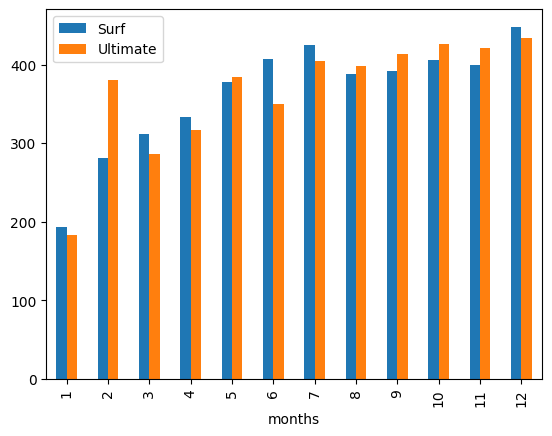

In [66]:
from matplotlib import pyplot as plt
calls_mean.plot(kind='bar')
plt.legend(['Surf', 'Ultimate'])
plt.show()

La duración de las llamadas se comporta de manera muy similar, en ambos planes para los 12 meses del año. Únicamente se observa un mayor consumos en febrero, para el plan ultimate que para el plan surf.

<AxesSubplot:ylabel='Frequency'>

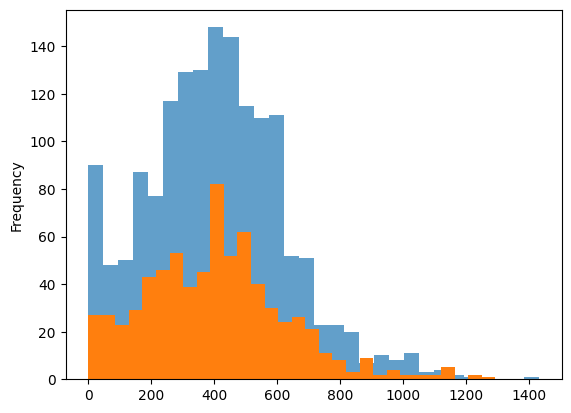

In [67]:
# Compara el número de minutos mensuales que necesitan los usuarios para cada plan.Traza un histograma
durationcalls_surf = users_consuming_plan[users_consuming_plan['plan'] == 'surf']
durationcalls_surf['duration_calls'].plot(kind='hist', bins=30, alpha=0.7)
durationcalls_ult = users_consuming_plan[users_consuming_plan['plan'] == 'ultimate']
durationcalls_ult['duration_calls'].plot(kind='hist', bins=30)

El consumo en minutos para los dos planes se distribuye similar siendo los picos alrededor de los 400 minutos.

In [68]:
# calcula la media y la varianza de la duración mensual de las llamadas 
print(durationcalls_ult['duration_calls'].mean())
print(durationcalls_ult['duration_calls'].var())
print(durationcalls_surf['duration_calls'].mean())
print(durationcalls_surf['duration_calls'].var())


406.7083333333333
51651.6616828929
405.2504767959313
49143.993201108395


<AxesSubplot:xlabel='duration_calls'>

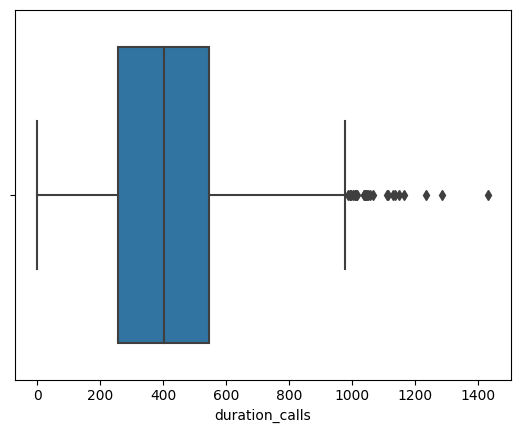

In [69]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
import seaborn as sns
sns.boxplot(durationcalls_surf['duration_calls'])

<AxesSubplot:xlabel='duration_calls'>

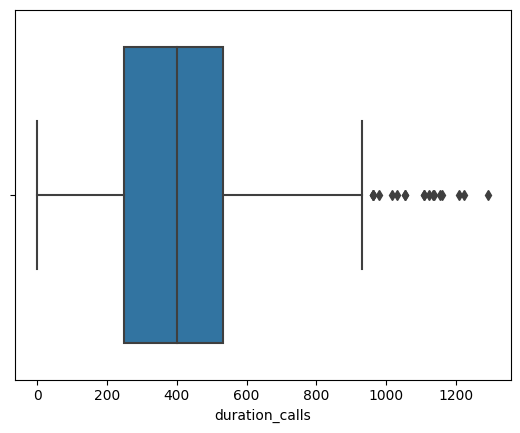

In [70]:
sns.boxplot(durationcalls_ult['duration_calls'])

El uso de minutos en las llamadas tiene un comportamiento similar para ambos planes. Incluso la distribución de los valores extremos, mas de 1000 minutos al mes, se observa de manera similar.

### Mensajes

In [71]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
#monthly_sms = users_consuming_plan.groupby(['plan', 'months'])['number_of_messages'].sum().reset_index()
monthly_sms = users_consuming_plan.pivot_table(index='months', columns='plan', values='number_of_messages', aggfunc='sum')
monthly_sms


plan,surf,ultimate
months,,
1,21.0,62.0
2,108.0,151.0
3,351.0,243.0
4,870.0,463.0
5,1849.0,931.0
6,2454.0,1379.0
7,3271.0,1937.0
8,4662.0,2732.0
9,5968.0,3259.0


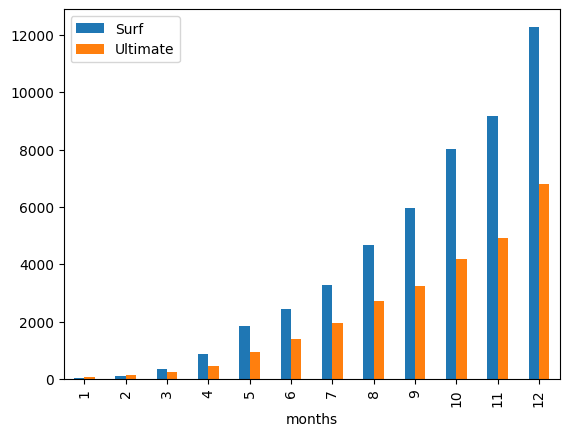

In [72]:
monthly_sms.plot(kind='bar')
plt.legend(['Surf', 'Ultimate'])
plt.show()

In [73]:
users_consuming_plan[users_consuming_plan['plan']=='ultimate'].count()

user_id               720
months                720
duration_calls        720
number_of_calls       720
number_of_messages    720
mb_used               720
plan                  720
cost_extracalls       720
cost_extra_sms        720
gb_used               720
cost_extra_gb         720
monthly_fare          720
total_extra_costs     720
dtype: int64

In [74]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
gbused = users_consuming_plan.groupby(['plan'])['gb_used'].sum().reset_index()
gbused
#monthly_gb = users_consuming_plan.pivot_table(index='months', columns='plan', values='gb_used', aggfunc='sum')
#monthly_gb

,plan,gb_used
0,surf,26223.0
1,ultimate,12461.0


Los usuarios de ambos planes usan en similar medida los sms considerando que en la muestra hay mas del doble de usuarios de surf que de ultimate.

### Internet

In [75]:
monthly_gb = users_consuming_plan.pivot_table(index='months', columns='plan', values='gb_used', aggfunc='sum')
monthly_gb

plan,surf,ultimate
months,,
1,10.0,29.0
2,110.0,121.0
3,312.0,221.0
4,611.0,343.0
5,1087.0,489.0
6,1502.0,725.0
7,2042.0,973.0
8,2735.0,1267.0
9,3238.0,1463.0


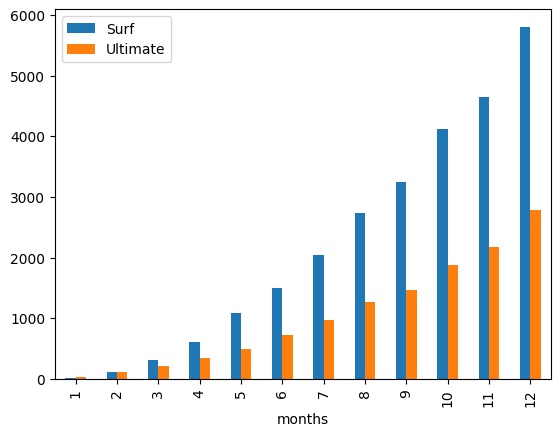

In [76]:
monthly_gb.plot(kind='bar')
plt.legend(['Surf', 'Ultimate'])
plt.show()

Los usuarios de ambos planes usan en similar medida los sms considerando que en la muestra hay mas del doble de usuarios de surf que de ultimate.

## Ingreso

In [77]:
users_consuming_plan[users_consuming_plan['plan']=='surf']['total_extra_costs'].describe()

count    1573.000000
mean       60.331933
std        55.263890
min        20.000000
25%        20.000000
50%        40.150000
75%        80.000000
max       588.660000
Name: total_extra_costs, dtype: float64

In [78]:
users_consuming_plan[users_consuming_plan['plan']=='ultimate']['total_extra_costs'].describe()

count    720.0
mean      70.0
std        0.0
min       70.0
25%       70.0
50%       70.0
75%       70.0
max       70.0
Name: total_extra_costs, dtype: float64

In [79]:
monthly_extracosts = users_consuming_plan.pivot_table(index='months', columns='plan', values='total_extra_costs', aggfunc='sum')
monthly_extracosts

plan,surf,ultimate
months,,
1,40.00,280.0
2,308.34,490.0
3,1053.23,840.0
4,2022.93,1470.0
5,3637.49,2030.0
6,4746.71,3290.0
7,7529.41,4130.0
8,10299.43,4970.0
9,11242.75,6020.0


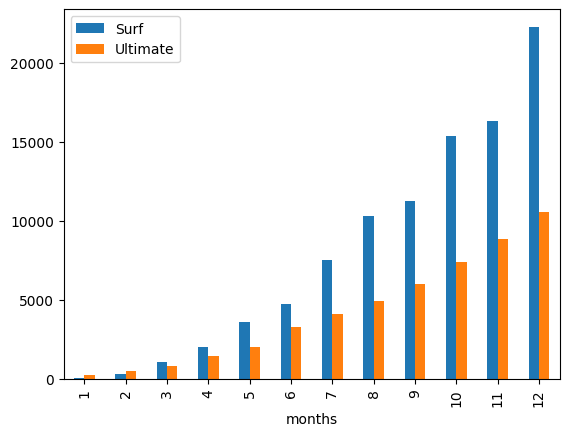

In [80]:
monthly_extracosts.plot(kind='bar')
plt.legend(['Surf', 'Ultimate'])
plt.show()

Se observa un mayor ingreso por parte de los usuarios del plan surf. Sin embargo habra que probar estadisticamente si es significativa esta diferencia.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente elección para las visualizaciones de datos. Además, calculaste correctamente la información estadística de cada distribución de datos (minutos, mensajes e internet). Esto permite identificar patrones de comportamiento en los usuarios y extraer información valiosa para la compañía.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Respecto a la información sobre **Ingresos**, seguramente los datos que obtuviste cambiarán cuando hagas el ajuste en el cálculo de los cobros mensuales por usuario en cada plan, entonces vale la pena revisar si tu análisis deba ser ajustado también.}

Para este conjunto de datos también puedes usar las gráficas que empleaste para los datos de mensajes, llamadas e internet. Esto te permitirá hacer un análisis más directo entre los usuarios de cada plan

</div>
</div>

## Prueba las hipótesis estadísticas

Ho = Los ingresos promedio mensuales de los planes surf y ultimate son iguales
Ha = Los ingresos promedio mensuales de los planes surf y ultimate son diferentes

In [81]:
# Prueba las hipótesis
surf_mean = users_consuming_plan[users_consuming_plan['plan']=='surf']['total_extra_costs']
ult_mean = users_consuming_plan[users_consuming_plan['plan']=='ultimate']['total_extra_costs']

In [82]:
from scipy import stats as st
alpha=0.05
results= st.ttest_ind(surf_mean, ult_mean)
print('valor p:', results.pvalue)
if results.pvalue < alpha:
     print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p: 2.8417299986434715e-06
Rechazamos la hipótesis nula


/tmp/ipykernel_32/3256685762.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results= st.ttest_ind(surf_mean, ult_mean)


Ho = Los ingresos promedio de los usuarios en NY-NJ son iguales al de las otras regiones
Ha = Los ingresos promedio de los usuarios en NY-NJ son difewrentes al de las otras regiones

In [83]:
# Se añade los datos de la ciudad
# Prueba las hipótesis
city = users_consuming_plan.merge(users, on='user_id')
city
#nynj = users_consuming_plan 


,user_id,months,duration_calls,number_of_calls,number_of_messages,mb_used,plan_x,cost_extracalls,cost_extra_sms,gb_used,cost_extra_gb,monthly_fare,total_extra_costs,first_name,last_name,age,city,reg_date,plan_y,churn_date
0,1000,12,117.0,16.0,11.0,1901.47,ultimate,0.0,0.00,2.0,0.0,70,70.00,Anamaria,Bauer,45,atlanta_sandy_springs_roswell_ga_msa,2018-12-24,ultimate,current
1,1001,8,172.0,27.0,30.0,6919.15,surf,0.0,0.00,7.0,0.0,20,20.00,Mickey,Wilkerson,28,seattle_tacoma_bellevue_wa_msa,2018-08-13,surf,current
2,1001,9,298.0,49.0,44.0,13314.82,surf,0.0,0.00,14.0,0.0,20,20.00,Mickey,Wilkerson,28,seattle_tacoma_bellevue_wa_msa,2018-08-13,surf,current
3,1001,10,375.0,65.0,53.0,22330.49,surf,0.0,0.09,22.0,70.0,20,90.09,Mickey,Wilkerson,28,seattle_tacoma_bellevue_wa_msa,2018-08-13,surf,current
4,1001,11,405.0,64.0,36.0,18504.30,surf,0.0,0.00,19.0,40.0,20,60.00,Mickey,Wilkerson,28,seattle_tacoma_bellevue_wa_msa,2018-08-13,surf,current
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,12,0.0,0.0,78.0,36730.05,ultimate,0.0,0.00,36.0,0.0,70,70.00,Sherly,Levy,44,chicago_naperville_elgin_il_in_wi_msa,2018-08-20,ultimate,current
2289,1349,10,0.0,0.0,76.0,13093.55,surf,0.0,0.78,13.0,0.0,20,20.78,Florentina,Diaz,69,boston_cambridge_newton_ma_nh_msa,2018-10-01,surf,current
2290,1349,11,0.0,0.0,72.0,17128.26,surf,0.0,0.66,17.0,20.0,20,40.66,Florentina,Diaz,69,boston_cambridge_newton_ma_nh_msa,2018-10-01,surf,current
2291,1349,12,0.0,0.0,61.0,13039.91,surf,0.0,0.33,13.0,0.0,20,20.33,Florentina,Diaz,69,boston_cambridge_newton_ma_nh_msa,2018-10-01,surf,current


In [84]:
#city['city'].unique()
ny = city[city['city']=='new_york_newark_jersey_city_ny_nj_pa_msa']['total_extra_costs']
others = city[city['city']!='new_york_newark_jersey_city_ny_nj_pa_msa']['total_extra_costs']
alpha=0.05
results= st.ttest_ind(ny, others)
print('valor p:', results.pvalue)
if results.pvalue < alpha:
     print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p: 0.033199561552334514
Rechazamos la hipótesis nula


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Francisco aplicaste correctamente las pruebas de hipótesis comparando la distribución de dos muestras independientes e interpretando de manera acertada el `p-value` obtenido y su relación con la hipótesis nula

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Te recomiendo realizar previamente una prueba de  [Levene](https://www.educaopen.com/digital-lab/blog/educacion-digital/prueba-de-levene) para evaluar la igualdad de las varianzas, lo que te permitirá configurar adecuadamente el parámetro **equal_var** en la función `ttest_ind`. Esto te brindará una interpretación más precisa de los resultados además garantizará que la prueba t sea estadísticamente válida.

</div>
</div>

## Conclusión general


El consumos de beneficios extra, que generaban un costo extra, fue notable en los usuarios del plan surf, siendo nulo para los usuarios del plan ultimate.
La proporción de uso de llamadas, sms e internet; no demostró diferencias.
EL costo de la tarifa base pareceria ser un factor al probar las hipótesis de que las medias de los ingresos mensuales eran iguales, sin embargo, resultó que la hipotesis se rechaza, siendo que hay diferencia dsignificativa entre ambos ingresos, derivado del alto consumo de los usuarios de surf.
Igualmente los usuarios en NY-NJ, muestra una diferencia significativa en el ingreso generado en esta region, en comparación de las otras regiones.
De acuerdo con las pruebas estadísticas realizadas, se muestra que el plan "surf", genera más ingresos que el plan "ultimate".

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Tu conclusión va alineada con la información que has obtenido en el proyecto. Aunque presentas una interpretación correcta, es importante revisar tu conclusión luego de hacer los ajustes que te mencioné más arriba, en en caso de que los valores hayan cambiado significativamente.

Además recuerda incluir una conclusión general de tu trabajo y dar respuesta a la pregunta inicial de este proyecto

```
"El departamento comercial quiere saber cuál de los planes genera más ingresos para poder ajustar el presupuesto de publicidad"

```

</div>